In [193]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [194]:
# Load the dataset
dataset = pd.read_csv('heart_attack_prediction_dataset.csv')
# , encoding = "utf-8"
dataset.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,2510,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,0,5,1,0
1,21,1,389,2815,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,3,4,0,0
2,21,0,324,3224,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,6,3,0,0
3,84,1,383,2689,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,3,4,0,0
4,66,1,318,3563,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,16,1,0,0


In [195]:
# Data Exploration
print("Dataset Shape:", dataset.shape )

Dataset Shape: (11248, 25)


In [196]:
print("Column Information: \n")
display(dataset.info())

Column Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              11248 non-null  int64  
 1   Sex                              11248 non-null  int64  
 2   Cholesterol                      11248 non-null  int64  
 3   Blood Pressure                   11248 non-null  int64  
 4   Heart Rate                       11248 non-null  int64  
 5   Diabetes                         11248 non-null  int64  
 6   Family History                   11248 non-null  int64  
 7   Smoking                          11248 non-null  int64  
 8   Obesity                          11248 non-null  int64  
 9   Alcohol Consumption              11248 non-null  int64  
 10  Exercise Hours Per Week          11248 non-null  float64
 11  Diet                             11248 non-null  int64  
 

None

In [197]:
print("Duplicate Row:",dataset.duplicated().sum() )

Duplicate Row: 0


In [198]:
print("Null Values:\n")
display(dataset.isnull().sum())

Null Values:



Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [199]:
print("Statistical Summary:\n")
display(dataset.describe())

Statistical Summary:



,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
count,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,...,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000
mean,53.754179,0.651671,260.118599,1953.046142,74.876156,0.603574,0.434299,0.878645,0.443723,0.546853,...,5.989866,158631.946124,28.911512,419.296319,3.391714,6.914829,9.284317,2.350284,0.302898,0.500000
std,20.442420,0.476462,77.861349,1116.348813,19.777486,0.489177,0.495687,0.326554,0.496845,0.497822,...,3.341026,80635.373417,6.073805,217.037711,2.205704,1.913912,5.579806,1.544453,0.459532,0.500022
min,18.000000,0.000000,120.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,196.000000,986.000000,58.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.201543,88380.000000,23.785827,235.000000,2.000000,5.000000,5.000000,1.000000,0.000000,0.000000
50%,54.000000,1.000000,259.000000,1950.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,5.947646,158469.000000,28.790270,421.500000,3.000000,7.000000,9.000000,2.000000,0.000000,0.500000
75%,71.000000,1.000000,325.000000,2913.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.803034,228711.000000,34.044117,604.000000,5.000000,8.000000,14.000000,3.000000,1.000000,1.000000
max,90.000000,1.000000,400.000000,3914.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,19.000000,5.000000,1.000000,1.000000


In [200]:
columns_to_drop = ['Previous Heart Problems', 'Sex', 'Diet', 'Medication Use', 
                   'Alcohol Consumption', 'Income', 'Continent', 'Country', 'Hemisphere']

# Drop the specified columns
data_cleaned = dataset.drop(columns=columns_to_drop, axis=1)

# Confirm the columns are removed
print("Remaining columns:", data_cleaned.columns)

Remaining columns: Index(['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Exercise Hours Per Week',
       'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')


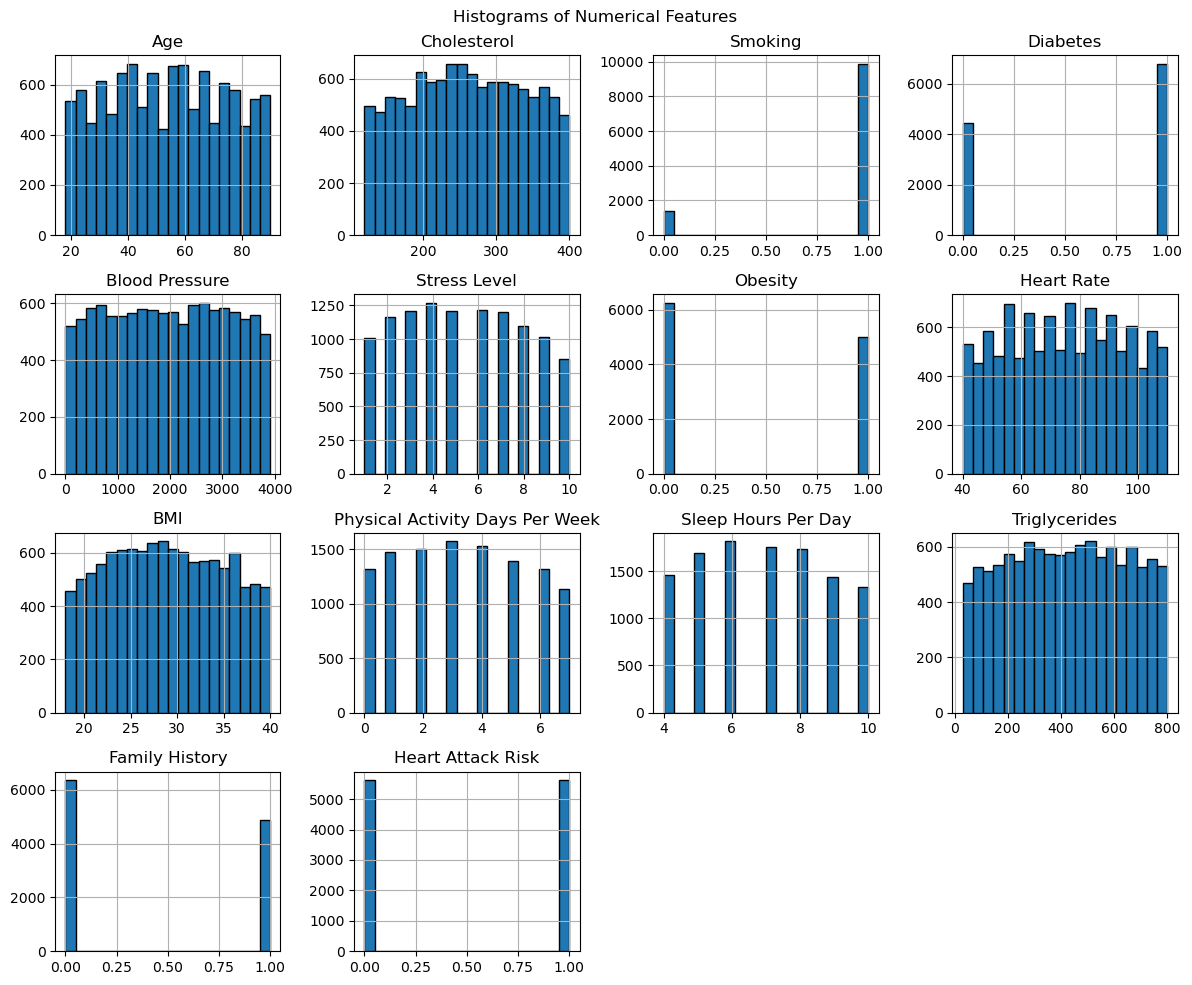

In [201]:
# Plot histograms for numerical columns
numerical_columns = ['Age','Cholesterol','Smoking','Diabetes','Blood Pressure','Stress Level', 'Obesity','Heart Rate','BMI','Physical Activity Days Per Week','Sleep Hours Per Day','Triglycerides','Family History','Heart Attack Risk']

data_cleaned[numerical_columns].hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

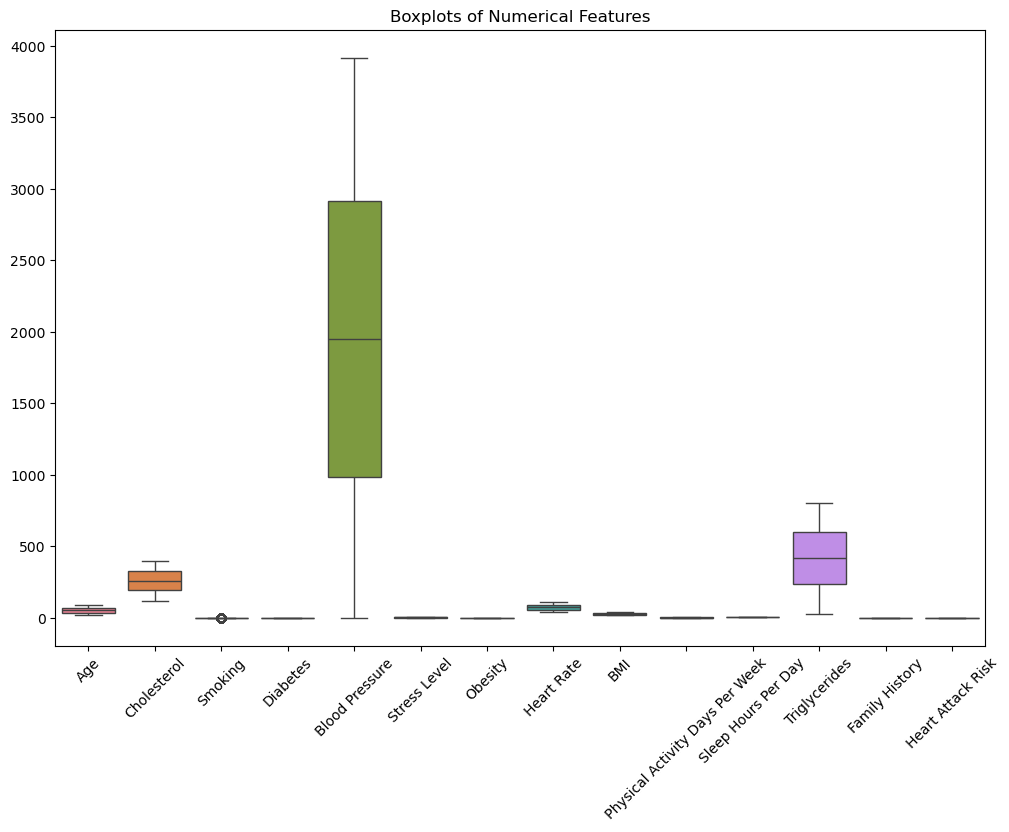

In [202]:
# Plot boxplots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned[numerical_columns])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

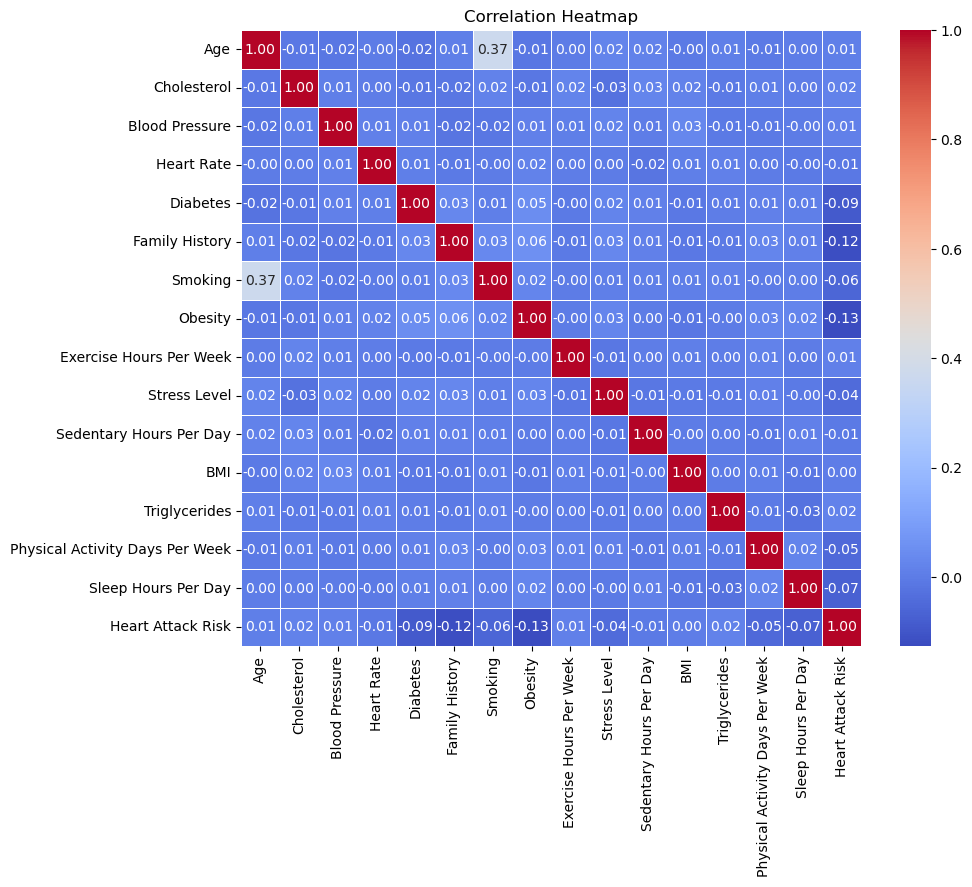

In [203]:
# Calculate correlations
numerical_columns = data_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = data_cleaned[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import joblib  # To save the best model

In [215]:
# Features and target
X = data_cleaned.drop(columns=['Heart Attack Risk'])
y = data_cleaned['Heart Attack Risk']
X = X.select_dtypes(include=['number'])

In [217]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [219]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [221]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_report = classification_report(y_test, y_pred_logreg, zero_division=0)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)

# Print results
print("Logistic Regression Evaluation:")
print(logreg_report)
print("Confusion Matrix:")
print(logreg_cm)

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      1681
           1       0.60      0.58      0.59      1694

    accuracy                           0.59      3375
   macro avg       0.59      0.59      0.59      3375
weighted avg       0.59      0.59      0.59      3375

Confusion Matrix:
[[1013  668]
 [ 707  987]]


In [223]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_rf = rf.predict(X_test_scaled)
rf_report = classification_report(y_test, y_pred_rf, zero_division=0)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Print results
print("Random Forest Evaluation:")
print(rf_report)
print("Confusion Matrix:")
print(rf_cm)

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1681
           1       0.68      0.59      0.63      1694

    accuracy                           0.66      3375
   macro avg       0.66      0.66      0.66      3375
weighted avg       0.66      0.66      0.65      3375

Confusion Matrix:
[[1220  461]
 [ 698  996]]


In [225]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_knn = knn.predict(X_test_scaled)
knn_report = classification_report(y_test, y_pred_knn, zero_division=0)
knn_cm = confusion_matrix(y_test, y_pred_knn)

# Print results
print("K-Nearest Neighbors Evaluation:")
print(knn_report)
print("Confusion Matrix:")
print(knn_cm)

K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

           0       0.64      0.49      0.55      1681
           1       0.59      0.72      0.65      1694

    accuracy                           0.61      3375
   macro avg       0.61      0.61      0.60      3375
weighted avg       0.61      0.61      0.60      3375

Confusion Matrix:
[[ 821  860]
 [ 467 1227]]


In [226]:
# Support Vector Machine Model
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_svm = svm.predict(X_test_scaled)
svm_report = classification_report(y_test, y_pred_svm, zero_division=0)
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Print results
print("Support Vector Machine Evaluation:")
print(svm_report)
print("Confusion Matrix:")
print(svm_cm)

Support Vector Machine Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67      1681
           1       0.68      0.56      0.61      1694

    accuracy                           0.64      3375
   macro avg       0.65      0.64      0.64      3375
weighted avg       0.65      0.64      0.64      3375

Confusion Matrix:
[[1229  452]
 [ 751  943]]


In [227]:
# Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_gb = gb.predict(X_test_scaled)
gb_report = classification_report(y_test, y_pred_gb, zero_division=0)
gb_cm = confusion_matrix(y_test, y_pred_gb)

# Print results
print("Gradient Boosting Evaluation:")
print(gb_report)
print("Confusion Matrix:")
print(gb_cm)

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1681
           1       0.64      0.62      0.63      1694

    accuracy                           0.64      3375
   macro avg       0.64      0.64      0.64      3375
weighted avg       0.64      0.64      0.64      3375

Confusion Matrix:
[[1093  588]
 [ 642 1052]]


In [229]:
# Store models and their evaluation results
models = {
    "Logistic Regression": logreg_report,
    "Random Forest": rf_report,
    "K-Nearest Neighbors": knn_report,
    "Support Vector Machine": svm_report,
    "Gradient Boosting": gb_report
}

In [230]:
# Calculate weighted average F1-scores using zero_division=0 to avoid precision issues
f1_scores = {
    "Logistic Regression": classification_report(y_test, y_pred_logreg, output_dict=True, zero_division=0)['weighted avg']['f1-score'],
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)['weighted avg']['f1-score'],
    "K-Nearest Neighbors": classification_report(y_test, y_pred_knn, output_dict=True, zero_division=0)['weighted avg']['f1-score'],
    "Support Vector Machine": classification_report(y_test, y_pred_svm, output_dict=True, zero_division=0)['weighted avg']['f1-score'],
    "Gradient Boosting": classification_report(y_test, y_pred_gb, output_dict=True, zero_division=0)['weighted avg']['f1-score']
}

# Print the F1-scores for comparison
for model, f1_score in f1_scores.items():
    print(f"{model} Weighted F1-Score: {f1_score:.4f}")

Logistic Regression Weighted F1-Score: 0.5926
Random Forest Weighted F1-Score: 0.6550
K-Nearest Neighbors Weighted F1-Score: 0.6012
Support Vector Machine Weighted F1-Score: 0.6409
Gradient Boosting Weighted F1-Score: 0.6355


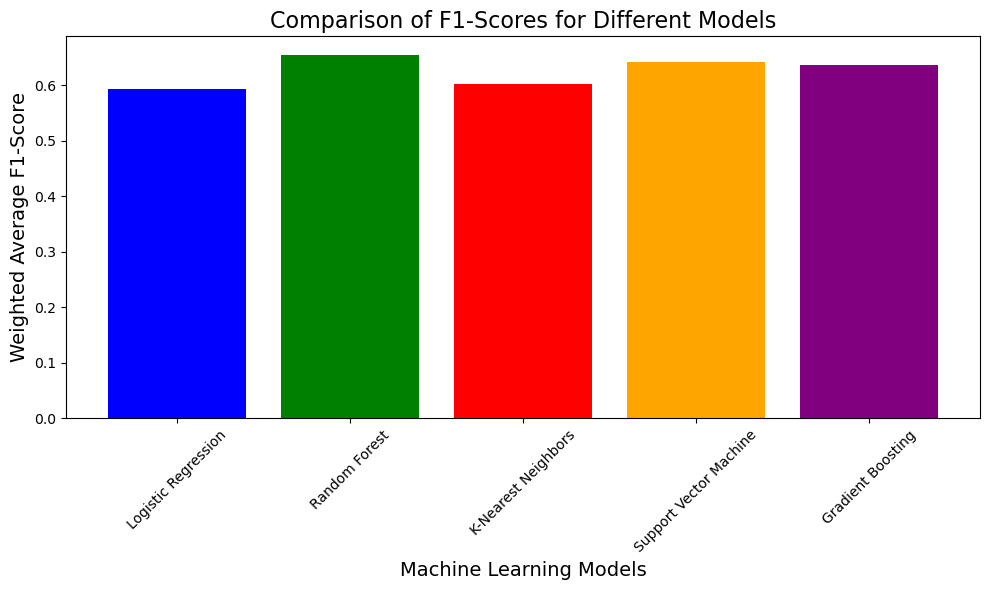

In [231]:
# Plotting the F1-scores of all models
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'red', 'orange', 'purple'])

# Adding titles and labels
plt.title("Comparison of F1-Scores for Different Models", fontsize=16)
plt.xlabel("Machine Learning Models", fontsize=14)
plt.ylabel("Weighted Average F1-Score", fontsize=14)

# Displaying the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [232]:
# Find the best model based on the highest F1-score
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"Best model based on F1 score: {best_model_name}")

Best model based on F1 score: Random Forest


In [233]:
# Select the best model based on F1-score
if best_model_name == "Logistic Regression":
    best_model = logreg
elif best_model_name == "Random Forest":
    best_model = rf
elif best_model_name == "K-Nearest Neighbors":
    best_model = knn
elif best_model_name == "Support Vector Machine":
    best_model = svm
else:
    best_model = gb

# Save the best model using joblib
joblib.dump(best_model, 'best_model.pkl')
print(f"Best model {best_model_name} saved as 'best_model.pkl'.")

Best model Random Forest saved as 'best_model.pkl'.


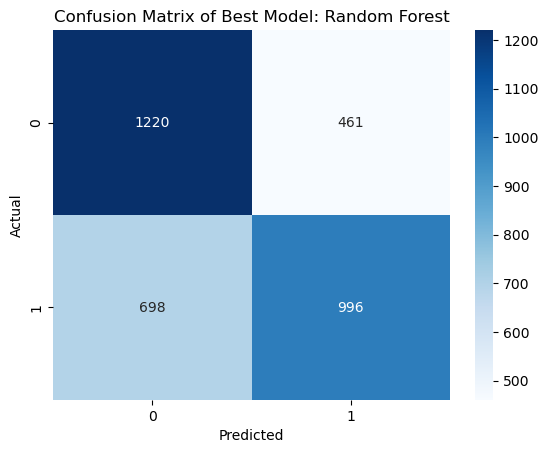

In [234]:
import numpy as np
# Display confusion matrix for the best model
best_cm = confusion_matrix(y_test, best_model.predict(X_test_scaled))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix of Best Model: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [235]:
print(X.columns)

Index(['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Exercise Hours Per Week',
       'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day'],
      dtype='object')
